**Applied Empirical Analysis (HS 2020)**

**Conny Wunsch, Ulrike Unterhofer and Véra Zabrodina** -- University of Basel

***

# Lab Session 4 - Difference-in-Differences (DiD)

***

Key ingredients for a DiD design
* Reform or treatment introduced at time $t$ for eligible units (treated), not for others (control).
* Data on outcomes for at least one period before, and one after treatment.
* DiD is based on the idea that the difference in outcomes between treated ($D = 1$) and control ($D = 0$) units in the pre-treatment period ($T = 0$) can be used to estimate selection bias
* This difference can then be subtracted from the difference in outcomes between treated and control units in the post-treatment period ($T = 1$).

![](./DID_HP.JPG)

## Application: The Arrival of Fast Internet and Employment in Africa
**Jonas Hjort and Jonas Poulsen, American Economic Review 2019**


## 1. Introduction

* What is the research question?
* Why is it interesting?
* What is the treatment? The outcome(s) of interest? 
* Why can you not just regress the outcome on the treatment, i.e. what is the endogeneity problem? 


In this replication, we focus on South African Quarterly Labour Force Survey data. Simplest setup, based on individuals' location rather than grid cell. 



***

## 2. Identification strategy and assumptions



### Setup and notation

Exploit connection to fast Internet via submarine cables over time. 

**Treatment** is not connection to Internet, rather *faster* Internet connection. The authors provide suggestive evidence that submarine cables did increase Internet speed in some countries.


Compare individuals who are close vs. far from the backbone network (existing, within-country Internet network). 

* **Treated group ($D_{i} = 1$):** individuals situated in a location (enumeration area) that lies within 500m of backbone network. 
* **Control group ($D_{i} = 0$):** individuals who are further than 500m away (but no more than 10km).
* **Treatment period ($T = 1$):** South Africa connected to submarine cables in 2009Q3.



Treatment defined at location, and not on individual level (no information on "last-mile" infrastructure, i.e. do not know exact individual connection status -- intention to treat?).  

* Location 1: Treated, centroid within 500m of backbone network
* Location 2: Control, further than 500m 
* Location 3: Excluded, more than 10km away 


![](./Figure1.JPG)



| Observed outcomes | Unobserved (counterfactual) outcomes |
|----:|----:|
| $Y^*_{0,0}$ for $T=0$ and $D_{i}=0$ | $Y^*_{1,0}$ for $T=0$ and $D_{i}=0$ |
| $Y^*_{1,0}$ for $T=0$ and $D_{i}=1$ | $Y^*_{0,0}$ for $T=0$ and $D_{i}=1$ |
| $Y^*_{0,1}$ for $T=1$ and $D_{i}=0$ | $Y^*_{1,1}$ for $T=1$ and $D_{i}=0$ | 
| $Y^*_{1,1}$ for $T=1$ and $D_{i}=1$ | $Y^*_{0,1}$ for $T=1$ and $D_{i}=1$ |




### Discussion of identifying assumptions

* What do these assumptions mean in words?
* What could invalidate them? Think of concrete examples or mechanisms.
* Which arguments or empirical evidence can you provide to support that they hold?


**A1: Stable unit treatment value assumption (SUTVA)**

$Y_{i,t}=D_{i}Y^*_{1,t}+(1-D_{i})Y^*_{0,t}$


**A2: No anticipation assumption**

No effect of the treatment in the pre-treatment period, conditional on $D$.

${\rm E}[Y^*_{1,0}-Y^*_{0,0}|D=0]={\rm E}[Y^*_{1,0}-Y^*_{0,0}|D=1]=0$


**A3: Common trend assumption**

The potential outcomes of the treated and controls follow the same time trend in the absence of the reform.

${\rm E}[Y^*_{0,1}-Y^*_{0,0}|D=0]={\rm E}[Y^*_{0,1}-Y^*_{0,0}|D=1]$


**What about covariates?**

Here, essentially do not use covariates for identification, only for robustness checks. 

Use location fixed effects to control for any time-invariant differences in employment outcomes that may be correlated with access to fast Internet.


### South Africa vs. other countries in the study

* Location vs. grid-cell fixed effects.
* Only one period where treatment was introduced (same for all treated individuals, no straggered introduction).
* No need for country fixed effects.




***

## 3. Empirical Analysis

### Load packages

In [ ]:
rm(list=ls())
options(repr.plot.width=8, repr.plot.height=5)

packages_vector <- c("tidyverse", "foreign", "haven", "Hmisc", 
                     "dplyr", "tidyr", "stringr", "dummies", 
                     "sandwich", "lmtest", "expss", "fastDummies", 
                     "psych", "fBasics", "knitr", "xtable", 
                     "sjlabelled", "data.table", "lubridate", 
                     "arsenal", "stargazer", "mfx", "jtools")
lapply(packages_vector, require, character.only = TRUE) 

# DiD-specific packages 
packaged_vector_did <- c("fixest")
lapply(packaged_vector_did, require, character.only = TRUE) 

# List loaded packages 
(.packages())

print('All packages successfully installed and loaded.')

### Data


South African Quarterly Labour Force Survey. 

|variable name |   description |
|----:|----:|
| location       |  Location ID (enumeration area)   |
| quarter        |  Quarter (YYYYQ)   |
| time           |  Time (normalized to period before treatment, 2009Q2)   |
| distance       |  Distance in meters (111.32m = 0.001 decimal degree)   |
| employed       |  Employment (0/1)   |
| skilled        |  Skilled   |
| hoursworked    |  Hours worked   |
| loghours       |  Hours worked (asinh)   |
| workmore       |  Wants to work more (0/1)   |
| formal         |  Formal employment (0/1)   |
| informal       |  Informal employment (0/1)   |
| distance_road  |  Distance to road   |
| distance_elec  |  Distance to electricity |

* What is the unit of observation? 

* What is the time unit? 

* Are there more than two periods? 

* Are the data panel or cross-sectional? 



In [30]:
data <- as.data.frame(read_dta("data.dta")) 

head(data)

,location,quarter,time,distance,employed,skilled,hoursworked,loghours,workmore,formal,informal,distance_road,distance_elec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10100017,20094,2,8810.14,1,0,45,4.499933,1,0,0,377.4297,14581.37
2,10100017,20094,2,8810.14,1,0,27,3.989327,1,0,0,377.4297,14581.37
3,10100017,20094,2,8810.14,1,0,36,4.276859,1,0,0,377.4297,14581.37
4,10100017,20094,2,8810.14,1,0,45,4.499933,1,0,0,377.4297,14581.37
5,10100017,20094,2,8810.14,1,0,45,4.499933,1,0,0,377.4297,14581.37
6,10100017,20094,2,8810.14,1,1,60,4.787561,0,0,0,377.4297,14581.37


***

## Descriptive statistics and validity checks

### Create and summarize DiD variables

Preferred connection radius is of 556.6m, i.e. 0.005 decimal degrees. 

In [31]:
# Treated group variable
radius <- 556.6 
data$connected <- ifelse(data$distance <= radius, 1, 0)

# Treatment period variable (after 2009Q3)
data$submarines <- ifelse(data$quarter >= 20093, 1, 0)

# Treatment variable (treated x post)
data$treatment <- data$connected * data$submarines

did_vars <- c("connected", "submarines", "treatment")

# Attach data 
attach(data)

The following objects are masked from data (pos = 3):

    connected, distance, distance_elec, distance_road, employed,
    formal, hoursworked, informal, location, loghours, quarter,
    skilled, submarines, time, treatment, workmore




Share of treated and control, before and after treatment

In [32]:
# DiD variables, before treatment is introduced
desc_before <- dplyr::filter(data, data$submarines==0) 
fBasics::basicStats(desc_before[did_vars]) %>% 
            t() %>% 
            as.data.frame() %>% 
            dplyr::select(Mean, Stdev, Minimum, Maximum, nobs)

,Mean,Stdev,Minimum,Maximum,nobs
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
connected,0.138878,0.34582,0,1,173519
submarines,0.000000,0.00000,0,0,173519
treatment,0.000000,0.00000,0,0,173519


In [33]:
# DiD variables, after treatment is introduced
desc_after <- dplyr::filter(data, data$submarines==1) 
fBasics::basicStats(desc_after[did_vars]) %>% 
            t() %>% 
            as.data.frame() %>% 
            dplyr::select(Mean, Stdev, Minimum, Maximum, nobs)

,Mean,Stdev,Minimum,Maximum,nobs
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
connected,0.138972,0.345919,0,1,107122
submarines,1.000000,0.000000,1,1,107122
treatment,0.138972,0.345919,0,1,107122


In [34]:
# What periods we have - calendar
cro(quarter)

,,#Total
Quarter (YYYYQ),20081,29786
,20082,29170
,20083,28945
,20084,28805
,20091,28891
,20092,27922
,20093,26622
,20094,26635
,20101,26923
,20102,26942


In [35]:
# Normalized time periods (to use in regressions)
cro(time)

,,#Total
"Time (normalized to period before treatment, 2009Q2)",-5,29786
,-4,29170
,-3,28945
,-2,28805
,-1,28891
,0,27922
,1,26622
,2,26635
,3,26923
,4,26942


### Summary statistics for employment outcomes by treatment group, before and after treatment



In [36]:
outcomes<- dplyr::select(data, employed, skilled, hoursworked) 
outcomes_names <- colnames(outcomes) 

In [37]:
# Function for table display
repr_html.xtable <- function(obj, ...){
    paste(capture.output(print(obj, type = 'html')), collapse="", sep="")
}

# Define a function estimating the differences in variables across D and T
balance_check.model <- function(x){

    # Conditional means
    mean_d0_before <- mean(x[data$connected==0 & data$submarines==0], na.rm=TRUE) # filters out missings 
    mean_d1_before <- mean(x[data$connected==1 & data$submarines==0], na.rm=TRUE)
    mean_d0_after <- mean(x[data$connected==0 & data$submarines==1], na.rm=TRUE) 
    mean_d1_after <- mean(x[data$connected==1 & data$submarines==1], na.rm=TRUE)
    
    # Difference in means before treatment
    diff_before <- lm(x[submarines==0] ~ data$connected[submarines==0])
    cov <- vcovHC(diff_before, type = "HC")
    robust.se_before <- sqrt(diag(cov))
    
    # Difference in means after treatment
    diff_after <- lm(x[submarines==1] ~ data$connected[submarines==1])
    cov <- vcovHC(diff_after, type = "HC")
    robust.se_after <- sqrt(diag(cov))
    
    list(mean_d0_before = mean_d0_before, 
         mean_d1_before = mean_d1_before,
         diff_before = diff_before$coefficients[2], 
         robust.se_before = robust.se_before[2], 
         pval_before = 2*pnorm(-abs(diff_before$coefficients[2]/robust.se_before[2])), 
         mean_d0_after = mean_d0_after, 
         mean_d1_after = mean_d1_after,
         diff_after = diff_after$coefficients[2], 
         robust.se_after = robust.se_after[2], 
         pval_after = 2*pnorm(-abs(diff_after$coefficients[2]/robust.se_after[2]))
        )             
}

diff_output <- apply(outcomes, 2, balance_check.model)

# convert list to table
diff_output<-rbindlist(diff_output)


# add a row with number of observations
n_d0_before <- nrow(data[data$connected==0 & data$submarines==0,])
n_d1_before <- nrow(data[data$connected==1 & data$submarines==0,])
n_d0_after <- nrow(data[data$connected==0 & data$submarines==1,])
n_d1_after <- nrow(data[data$connected==1 & data$submarines==1,])
obs <-c(n_d0_before, n_d1_before, NA, NA, NA, n_d0_after, n_d1_after, NA, NA, NA)


diff_output <- rbind(as.matrix(diff_output), obs)

rownames(diff_output)<- c(outcomes_names, "Observations")
colnames(diff_output)<- c("E(Y|D=0, T=0)", "E(Y|D=1, T=0)", 
                          "Difference", "s.e.", "p-value", 
                          "E(Y|D=0, T=1)", "E(Y|D=1, T=1)", 
                          "Difference", "s.e.", "p-value")

print("Average employment outcomes for treated and control, before and after treatment")
xtable(diff_output, digits=2)

[1] "Average employment outcomes for treated and control, before and after treatment"


,"E(Y|D=0, T=0)","E(Y|D=1, T=0)",Difference,s.e.,p-value,"E(Y|D=0, T=1)","E(Y|D=1, T=1)",Difference,s.e.,p-value
employed,0.72,0.77,0.05,0.00,0.00,0.68,0.74,0.06,0.00,0.00
skilled,0.50,0.56,0.07,0.00,0.00,0.47,0.54,0.07,0.00,0.00
hoursworked,44.68,44.35,-0.33,0.11,0.00,44.26,44.17,-0.08,0.13,0.53
Observations,149421.00,24098.00,,,,92235.00,14887.00,,,


In HP, Table 1 shows summary statistics for the first quarter of observation only (before treatment, in 2008Q1).

### Common trends graph

Unadjusted means of the outcome variable by treatment group and quarter.

Time normalized to pre-treatment period.

Figure 6 of HP (with 2 additional periods before compared to paper!)

`summarise()` regrouping output by 'time' (override with `.groups` argument)



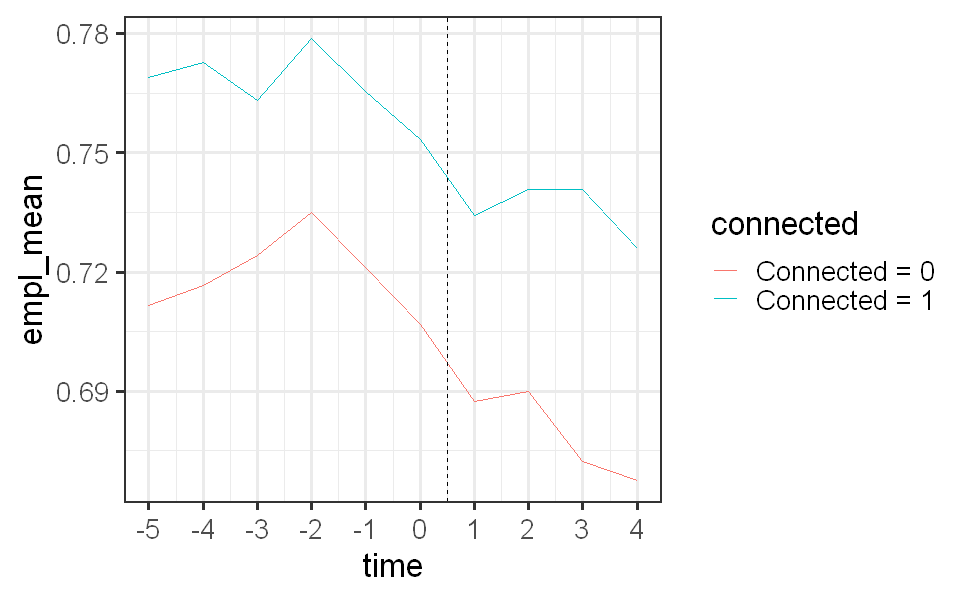

In [38]:
# Create a group-means data set
common_trends <- data %>% 
                 group_by(time, connected) %>% 
                 summarise(empl_mean = mean(employed))

common_trends$connected <- factor(common_trends$connected, 
                                  levels = c(0,1), 
                                  label = c("Connected = 0", 
                                            "Connected = 1")) 

ggplot(data = common_trends, 
       aes(x = time, y = empl_mean, 
           group = connected, 
           color = connected)) + 
  geom_line() +
  geom_vline(xintercept = 0.5, linetype="dashed") +
  scale_x_continuous(breaks = seq(-5, 4, by = 1)) +
  theme_bw(base_size = 20)

`summarise()` regrouping output by 'time' (override with `.groups` argument)



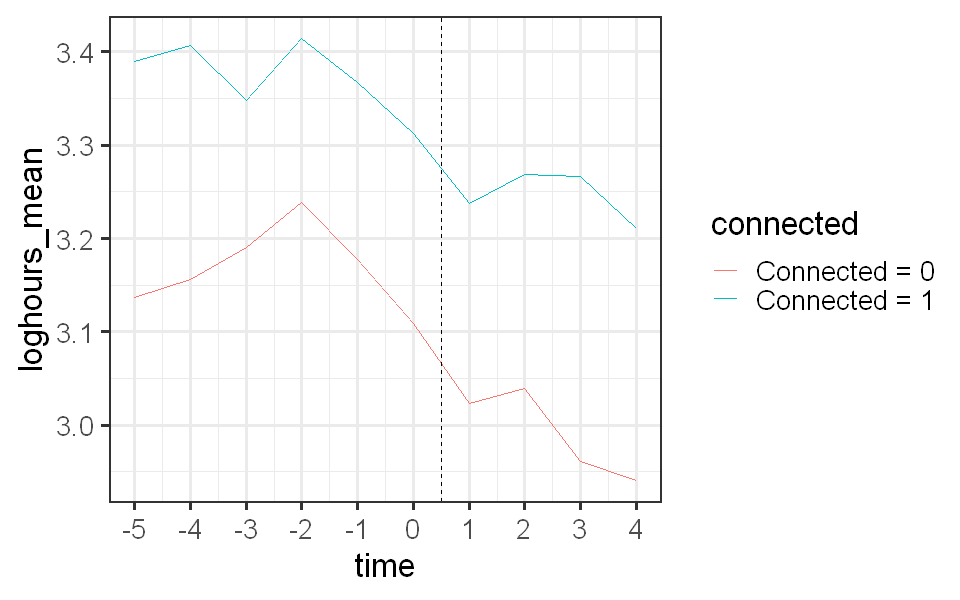

In [39]:
# Alternative outcome -  log hours worked
common_trends <- data %>% 
                 group_by(time, connected) %>% 
                 summarise(loghours_mean = mean(loghours))

common_trends$connected <- factor(common_trends$connected, 
                                  levels = c(0,1), 
                                  label = c("Connected = 0", 
                                            "Connected = 1")) 

ggplot(data = common_trends, 
       aes(x = time, y = loghours_mean, 
           group = connected, 
           color = connected)) + 
  geom_line() +
  geom_vline(xintercept = 0.5, linetype="dashed") +
  scale_x_continuous(breaks = seq(-5, 4, by = 1)) +
  theme_bw(base_size = 20) 

***

## DiD effect estimation 

Using the `fixest` package. 
For more details, see https://cran.r-project.org/web/packages/fixest/vignettes/fixest_walkthrough.html


![](./DID_HP.JPG)




### (1) Simple DiD, without fixed effects


$Y_{it} = \alpha + \delta Connected_i + \gamma SubmarineCables_t + \beta SubmarineCables_{t} \times Connected_i + \varepsilon_{it}$

where $Y_{it}$ is the outcome for individual $i$ in a specific location at time $t$. 

* $E[Y_{it}| Connected_i = 0, SubmarineCables_t = 0] = \alpha$
* $E[Y_{it}| Connected_i = 1, SubmarineCables_t = 0] = \alpha + \delta $
* $E[Y_{it}| Connected_i = 0, SubmarineCables_t = 1] = \alpha + \gamma $
* $E[Y_{it}| Connected_i = 1, SubmarineCables_t = 1] = \alpha + \delta + \gamma + \beta $

The effect of interest is: 

$$ \beta = E[Y_{it}| Connected_i = 1, SubmarineCables_t = 1] - E[Y_{it}| Connected_i = 1, SubmarineCables_t = 0] - \{ E[Y_{it}| Connected_i = 0, SubmarineCables_t = 1] - E[Y_{it}| Connected_i = 0, SubmarineCables_t = 0] \}$$

$$ = \alpha + \delta + \gamma + \beta - (\alpha + \delta) - \{(\alpha + \gamma) - \alpha\} $$

$$ = \beta $$


* No control variables in this application. Estimation by OLS corresponds to estimating non-parametric differences in means.


* We cluster standard errors by location. 

This specification is not in HP. 

In [40]:
did1 <- feols(employed ~ connected + submarines + treatment, data)
did1 <- summary(did1, cluster = "location")
did1

OLS estimation, Dep. Var.: employed
Observations: 280,641 
Standard-errors: Clustered (location) 
             Estimate Std. Error    t value  Pr(>|t|)    
(Intercept)  0.719250   0.003752 191.690000 < 2.2e-16 ***
connected    0.047826   0.009961   4.801500  1.58e-06 ***
submarines  -0.040006   0.003892 -10.279000 < 2.2e-16 ***
treatment    0.008270   0.010102   0.818624  0.413001    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-likelihood: -175,692.10   Adj. R2: 0.00325 

### (2) Simple DiD with quarter fixed effects only

$Y_{it} =  \delta Connected_i + \gamma_t + \beta SubmarineCables_{t} \times Connected_i + \varepsilon_{it}$


* Quarter fixed effects $\gamma_t$ absorb the $SubmarineCables_t$ variable, and the intercept. 


* We allow for differences in employment outcomes that vary across quarters but are common to connected and non-connected regions. 


* $\beta$ still averages over the all post-treatment periods. We assume a homogeneous treatment effect across quarters.

This specification is not in HP.

In [41]:
did2 <- feols(employed ~ connected + treatment | time, data)
did2 <- summary(did2, cluster = "location")
did2

OLS estimation, Dep. Var.: employed
Observations: 280,641 
Fixed-effects: time: 10
Standard-errors: Clustered (location) 
          Estimate Std. Error  t value   Pr(>|t|)    
connected 0.047800   0.009959 4.799600 0.00000159 ***
treatment 0.008235   0.010097 0.815655 0.41469800    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-likelihood: -175,640.83   Adj. R2: 0.00358 
                            R2-Within: 0.00152 

### (3) Fixed effects with panel data, with quarter and location fixed effects 

Main specification in HP: Table 3, Panel A, column (3)

$Y_{it} = \delta_i + \gamma_t + \beta SubmarineCables_{t} \times Connected_i + \varepsilon_{it}$


* Location fixed effects absorb the $Connected_i$ variable. 


* We allow for:
    * differences across regions in the connected and non-connected areas that are constant across quarters and 
    * differences across quarters that are constant across regions.


* We still assume treatement effect homogeneity:  $\beta$ is constant for the post-treatment period and does not vary across regions.


In [42]:
did3 <- feols(employed ~ treatment | time + location, data)
did3 <- summary(did3, cluster = "location")
did3

OLS estimation, Dep. Var.: employed
Observations: 280,641 
Fixed-effects: time: 10,  location: 3169
Standard-errors: Clustered (location) 
          Estimate Std. Error t value Pr(>|t|)    
treatment 0.021732   0.007919  2.7442 0.006066 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-likelihood: -155,278.62   Adj. R2: 0.12834 
                            R2-Within: 6e-05 

How high is the effect?

* in percentage points

* in percent

Hint: the sample mean of the outcome is 0.72 (across all periods and treatment groups).

### (4) Event study 


$Y_{i,t} = \delta_i + \gamma_t + \sum_{j=-5}^{4}\beta_j Time_j \times Connected_{i} +\varepsilon_{it}$

* where the sum contains time x treated interaction terms over the observation period (`quarter = 2008Q1,..., 2010Q2`, `time =  -5,..., 4`), with the pre-treatment quarter 2009Q2 normalized the omitted reference 'category' (`time = 0`). The quarter-specific treatment effect is then $\beta_j$.


* Allows for changes in the treatment effect over time.


* Serves to check plausibility of common trends and no anticipation assumptions. All coefficients on the leads of the treatment (pre-treatment) should not differ significantly from zero if CT holds. 


* Shows potential gradual bite of treatment effect after implementation. 

This specification is not shown in HP.

The next 3 cells do not run on Binder!



In [43]:
did4 <- feols(employed ~ connected::time(0) | time + location, data)
did4 <- summary(did4, cluster = "location")
did4

OLS estimation, Dep. Var.: employed
Observations: 280,641 
Fixed-effects: time: 10,  location: 3169
Standard-errors: Clustered (location) 
                    Estimate Std. Error   t value Pr(>|t|)    
connected:time::-5  0.010123   0.010842  0.933768 0.350425    
connected:time::-4  0.006469   0.011183  0.578427 0.562976    
connected:time::-3 -0.012766   0.011028 -1.157600 0.247034    
connected:time::-2 -0.002988   0.009781 -0.305522 0.759969    
connected:time::-1 -0.001483   0.008600 -0.172410 0.863115    
connected:time::1   0.008713   0.009372  0.929755 0.352499    
connected:time::2   0.018491   0.010252  1.803700 0.071286 .  
connected:time::3   0.032733   0.011132  2.940600 0.003276 ** 
connected:time::4   0.030942   0.011314  2.734800 0.006242 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-likelihood: -155,272.22   Adj. R2: 0.12835 
                            R2-Within: 1e-04 

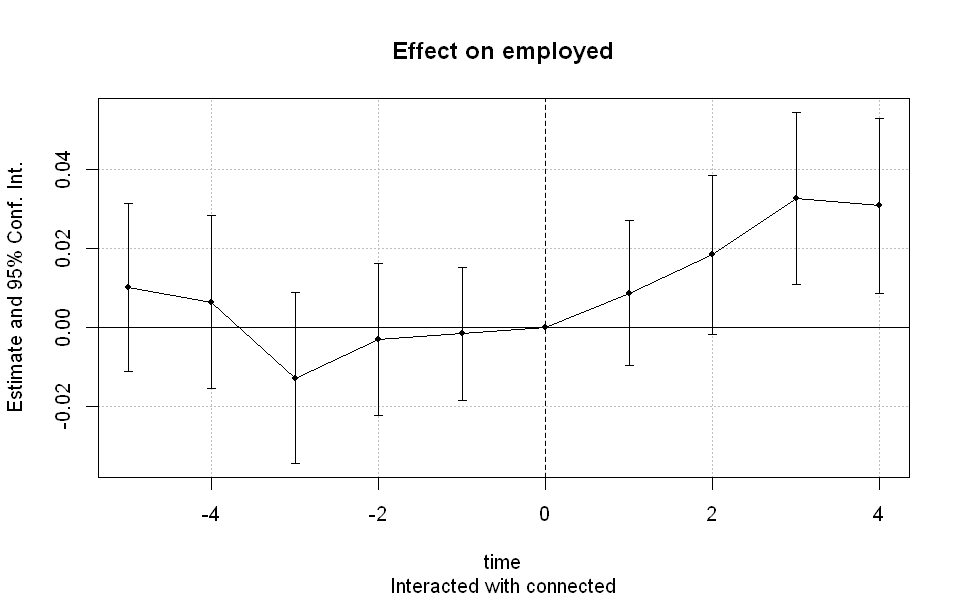

In [44]:
coefplot(did4) 

### Compare estimates

In [45]:
etable(did1, did2, did3, did4, 
       cluster="location", 
       subtitles = c("Standard DiD", "Quarter FE", 
                     "Location + quarter FE", "Event study"))

,Standard DiD,Quarter FE,Location + quarter..,Event study
,<fct>,<fct>,<fct>,<fct>
(Intercept),0.7192*** (0.003752),,,
connected,0.04783*** (0.009961),0.0478*** (0.009959),,
submarines,-0.04001*** (0.003892),,,
treatment,0.00827 (0.0101),0.008235 (0.0101),0.02173** (0.007919),
connected:time::-5,,,,0.01012 (0.01084)
connected:time::-4,,,,0.006469 (0.01118)
connected:time::-3,,,,-0.01277 (0.01103)
connected:time::-2,,,,-0.002988 (0.009781)
connected:time::-1,,,,-0.001483 (0.0086)


***

## Extensions

### Varying the assumed connection radius 

Figure 4 in HP

The choice of 500m distance to define treated and control groups is arbitrary. Need to show that this choice makes sense, and varying this cutoff affects estimates in a sensible way (i.e. the effect decreases with distance). 

How do you expect the treatment effect estimate to change, if you increase the radius?

Rerun specification (3) with alternative definitions of the treated/control groups. 

In [46]:
# Define vector of radii
radius_range <- as.matrix(seq(400, 2000, by=100))
radius_range 

400
500
600
700
800
900
1000
1100
1200
1300
1400


In [47]:
# Define function to estimate effect for each radius
radius_vary <- function(r) {          
  
  if (is.numeric(r)) {

    data$newconnected <- ifelse(distance <= r, 1, 0)
    data$newtreatment <- data$newconnected * submarines

    out <- feols(employed ~ newtreatment | time + location, data)
    list(radius=r, effect=out$coeftable[[1,1]], se=out$coeftable[[1,2]])

  } else {
    print("ERROR - Radius must be numeric")
  }

}

# Run function over rows (1) of possible radii vector
radius_out <- apply(radius_range, 1, radius_vary)

Warning message:
"Removed 6 rows containing missing values (geom_point)."


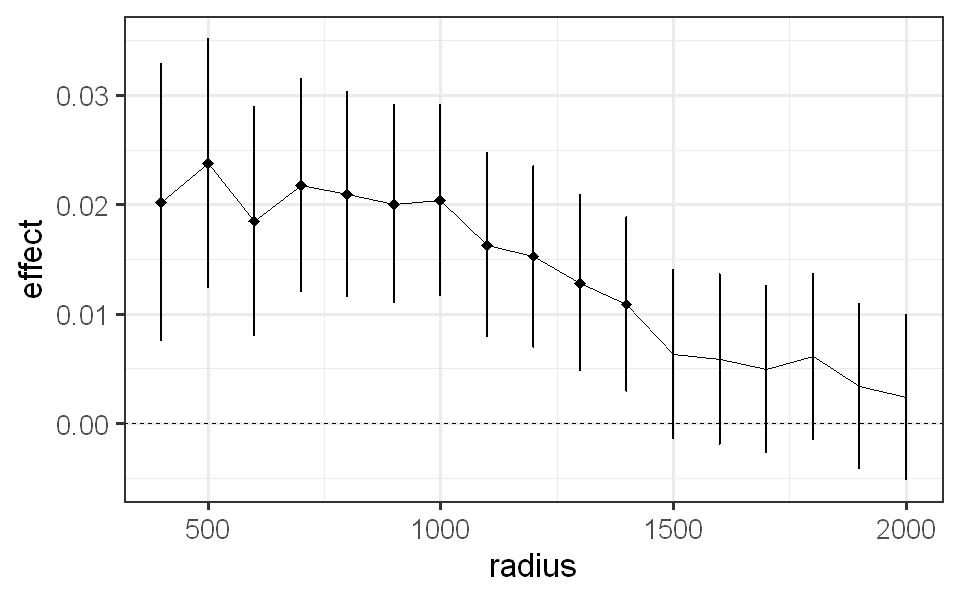

In [48]:
# Plot estimates

# convert list to table and create confidence intervals
radius_table <- rbindlist(radius_out)
radius_table$cil <- radius_table$effect - 1.96*radius_table$se
radius_table$cih <- radius_table$effect + 1.96*radius_table$se
radius_table$sig <- ifelse(abs(radius_table$effect)/radius_table$se>1.64, 
                           radius_table$effect, NA)

ggplot(radius_table, aes(x = radius, y = effect)) +
  geom_line() +
  geom_point(aes(x = radius, y = sig), shape = 18, size  = 3) +
  geom_errorbar(aes(ymin  = cil, ymax  = cih), width = 0.2, size  = 0.7) +
  geom_hline(yintercept = 0, linetype="dashed") + 
  theme_bw(base_size = 20) 

### Placebo effect of road and electricity infrastructure 

Table 4, column (5) in HP (here, no data on 3G connectivity)

So far, no use of covariates that vary across time and locations.

Connected locations are typically closer to other infrastructure (e.g. roads, electricity). If such infrastructure leads to systematically faster growth in employment, might misattribute effect of this infrastructure to fast Internet. 

Include 'placebo treatment' variables in specification (3), i.e. interaction terms between being connected to roads/electricity, and the arrival of submarine cables. 

In [49]:
# Create road and electricity connected variables
data$connected_elec <- ifelse(distance_elec <= radius, 1, 0)
data$connected_road <- ifelse(distance_road <= radius, 1, 0)

# Create placebo treatment variable (treated x post)
data$treatment_elec <- data$connected_elec * submarines
data$treatment_road <- data$connected_road * submarines

# Fixed effects DiD estimation (with location fixed effects)
out <- feols(employed ~ treatment 
                      + treatment_elec 
                      + treatment_road 
             | time + location, data)
out <- summary(out, cluster = "location")
out

OLS estimation, Dep. Var.: employed
Observations: 280,641 
Fixed-effects: time: 10,  location: 3169
Standard-errors: Clustered (location) 
                Estimate Std. Error   t value Pr(>|t|)    
treatment       0.021410   0.007972  2.685800 0.007236 ** 
treatment_elec -0.012186   0.017042 -0.715064 0.474570    
treatment_road  0.000471   0.005968  0.078978 0.937050    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-likelihood: -155,277.94   Adj. R2: 0.12833 
                            R2-Within: 6e-05 

### Binary vs. continuous treatment 

What if the treatment was continuous instead of binary? 

In [50]:
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))